

# Project: Investigate a Dataset - [TMDB movies dataset]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

>This data set contains information about 10,000 movies collected from The Movie Database (TMDb),including user ratings and revenue.I'll ask questions related to genres and popularity.


In [ ]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
% matplotlib inline
# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


<a id='wrangling'></a>
## Data Wrangling

> In this section of the report, Iwill load in the data, check for cleanliness, and then trim and clean your dataset for analysis.


### General Properties


## Dataset chosen for analysis: TMDB movies
This data set contains information about 10,000 movies collected from The Movie Database (TMDb),including user ratings and revenue.I'll ask questions related to genres and popularity.

## Questions to answer:
1- Which genres are most popular from year to year?

2- What kinds of properties are associated with movies that have high revenues?

In [ ]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('tmdb-movies.csv')
df.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


In [ ]:
df.shape #shape of dataframe

(10866, 21)

In [ ]:
df.info()   # checking the if there's any Null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [ ]:
df.describe() #full discribtion statistical for the dataset

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [ ]:
df.head(5)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09



### Data Cleaning
####Data Structure
Before working with the data I checked the data and found missing values,the data types. After getting more information and depends on the questions wanted to discover, I cleaned the data. There were unecessary columns with missing data, inappropriate datatypes. The columns 'genres' and 'production_companies' contained multiple values that doesn't meet the requirements of the normal form.
####Drop the unneeded comlumns
1-drop homepage column as most of it's values contains Null.

2-drop imdb_id as id column exists.

3-drop tagline','keywords','overview','cast' to be more readable

4-drop revenue_adj , budget_adj as they have high correletion with revenue and bugdet 
####The Cleaning Process
1-removing unnecessary columns.

2-dropped the Null value raws

3- convert release_date from string to date datatype.

4 -The column 'genres' and 'productions_companies' should not have multiple value in the same row of data. so I removed the values after the first '|' sign to get better grouping and cleaner .







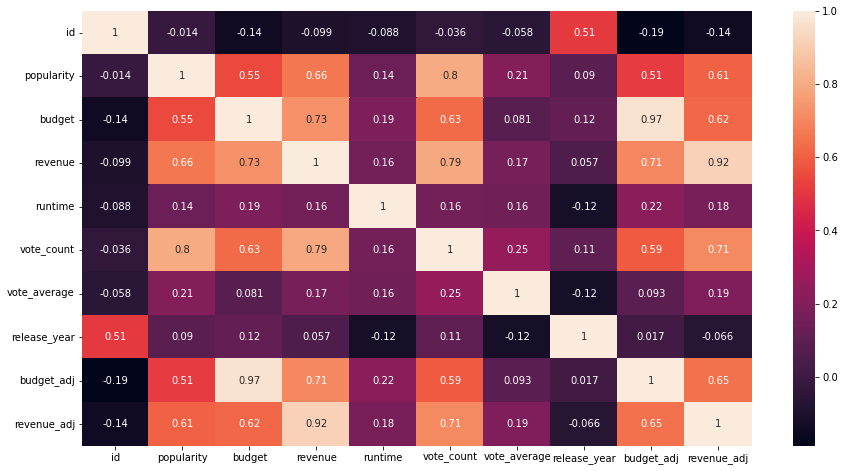

In [ ]:
plt.figure(figsize = (15,8))
ax = sns.heatmap(df.corr(), annot=True)

In [ ]:
df.drop(['homepage','imdb_id','tagline','keywords','overview','cast','budget_adj','revenue_adj'] , inplace=True ,axis=1)

In [ ]:
df.head(5)

,id,popularity,budget,revenue,original_title,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015
2,262500,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015
4,168259,9.335014,190000000,1506249360,Furious 7,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015


In [ ]:
df.dropna(inplace=True)

In [ ]:
df.info() # number of entries after removing all the null values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9807 entries, 0 to 10865
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    9807 non-null   int64  
 1   popularity            9807 non-null   float64
 2   budget                9807 non-null   int64  
 3   revenue               9807 non-null   int64  
 4   original_title        9807 non-null   object 
 5   director              9807 non-null   object 
 6   runtime               9807 non-null   int64  
 7   genres                9807 non-null   object 
 8   production_companies  9807 non-null   object 
 9   release_date          9807 non-null   object 
 10  vote_count            9807 non-null   int64  
 11  vote_average          9807 non-null   float64
 12  release_year          9807 non-null   int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 1.0+ MB


In [ ]:
df['release_date'] = pd.to_datetime(df['release_date'])
df['release_date']

0       2015-06-09
1       2015-05-13
2       2015-03-18
3       2015-12-15
4       2015-04-01
           ...    
10861   2066-06-15
10862   2066-12-21
10863   2066-01-01
10864   2066-11-02
10865   2066-11-15
Name: release_date, Length: 9807, dtype: datetime64[ns]

In [ ]:
df['genres'] = df['genres'].apply(lambda x: x.split('|')[0])
df['production_companies'] = df['production_companies'].apply(lambda x: x.split('|')[0])
df.head(5)

,id,popularity,budget,revenue,original_title,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action,Universal Studios,2015-06-09,5562,6.5,2015
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action,Village Roadshow Pictures,2015-05-13,6185,7.1,2015
2,262500,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119,Adventure,Summit Entertainment,2015-03-18,2480,6.3,2015
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,Action,Lucasfilm,2015-12-15,5292,7.5,2015
4,168259,9.335014,190000000,1506249360,Furious 7,James Wan,137,Action,Universal Pictures,2015-04-01,2947,7.3,2015


<a id='eda'></a>
## Exploratory Data Analysis
After cleaning my dataset Now I'll analyze it looking at the genres of movies and it's relations with other variables.


##Which genres are most popular from year to year?

In [ ]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
genres_pop = df.groupby(['genres'])['popularity'].mean()
print (genres_pop)

genres
Action             0.875737
Adventure          1.275178
Animation          0.871280
Comedy             0.572296
Crime              0.719409
Documentary        0.209573
Drama              0.587012
Family             0.783861
Fantasy            0.907793
Foreign            0.232168
History            0.839363
Horror             0.487790
Music              0.528743
Mystery            0.621116
Romance            0.786560
Science Fiction    1.156476
TV Movie           0.268062
Thriller           0.691054
War                0.789277
Western            0.690646
Name: popularity, dtype: float64


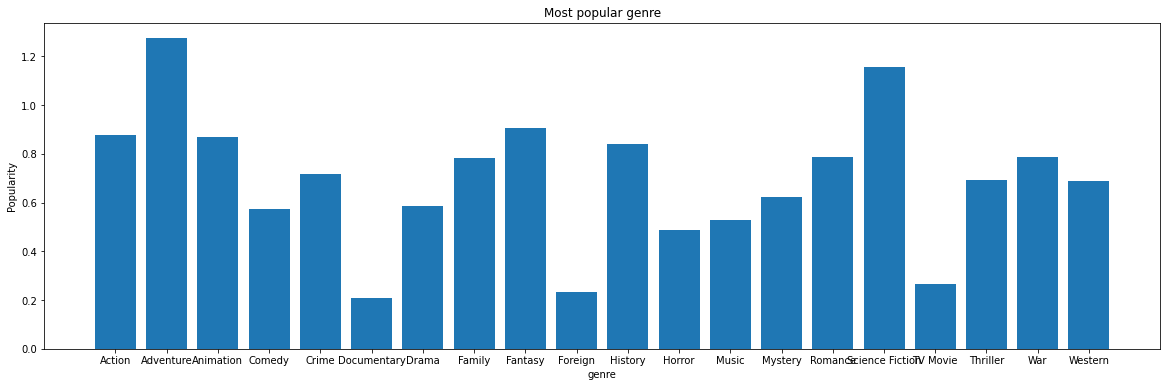

In [ ]:
plt.subplots(figsize=(20, 6))
plt.bar(genres_pop.index, genres_pop)
plt.title('Most popular genre')
plt.xlabel('genre')
plt.ylabel('Popularity');

 Adventure movies is the most popular genre.

# What kinds of properties are associated with movies that have high revenues?

In [ ]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.

sorted_revenue = df.sort_values(by=['revenue'], ascending = False).head(100)
sorted_revenue.head(10) #Fisrt top 100 for the highest revene


,id,popularity,budget,revenue,original_title,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
1386,19995,9.432768,237000000,2781505847,Avatar,James Cameron,162,Action,Ingenious Film Partners,2009-12-10,8458,7.1,2009
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,Action,Lucasfilm,2015-12-15,5292,7.5,2015
5231,597,4.355219,200000000,1845034188,Titanic,James Cameron,194,Drama,Paramount Pictures,1997-11-18,4654,7.3,1997
4361,24428,7.637767,220000000,1519557910,The Avengers,Joss Whedon,143,Science Fiction,Marvel Studios,2012-04-25,8903,7.3,2012
0,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action,Universal Studios,2015-06-09,5562,6.5,2015
4,168259,9.335014,190000000,1506249360,Furious 7,James Wan,137,Action,Universal Pictures,2015-04-01,2947,7.3,2015
14,99861,5.944927,280000000,1405035767,Avengers: Age of Ultron,Joss Whedon,141,Action,Marvel Studios,2015-04-22,4304,7.4,2015
3374,12445,5.711315,125000000,1327817822,Harry Potter and the Deathly Hallows: Part 2,David Yates,130,Adventure,Warner Bros.,2011-07-07,3750,7.7,2011
5422,109445,6.112766,150000000,1274219009,Frozen,Chris Buck|Jennifer Lee,102,Animation,Walt Disney Pictures,2013-11-27,3369,7.5,2013
5425,68721,4.946136,200000000,1215439994,Iron Man 3,Shane Black,130,Action,Marvel Studios,2013-04-18,6882,6.9,2013


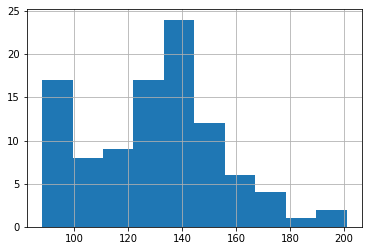

In [ ]:
sorted_revenue.runtime.hist()

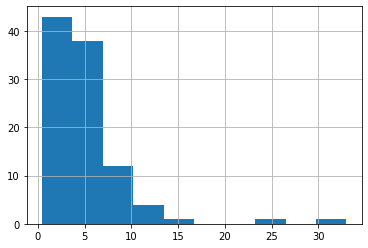

In [ ]:
sorted_revenue.popularity.hist()

the most revenuable movies has popularity around 2.5 and it's run time is between 100-130 min for most of them

##Conclusions

In the first question the adventure movies was the most popular genre then science fiction movies.

In the second questions, the most revenuable movies is about 2.5 popularity and it's runtime approximately 100-130 min.
### Limitations
the data having null values with high percentage and there're  highly correlated features. which will lead to  wrong prediction and generalization .

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])